In [35]:
import geopandas as gpd
import fiona as fi
%matplotlib inline

In [84]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

In [86]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [89]:
country_shapes.head()

,geometry,iso_a3,name
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina


In [90]:
country_names.head()

,name,iso_a3
0,Afghanistan,AFG
1,Angola,AGO
2,Albania,ALB
3,United Arab Emirates,ARE
4,Argentina,ARG


In [94]:
country_shapes = country_shapes.merge(country_names, on='iso_a3')
country_shapes.head()

,geometry,iso_a3,name_x,name_y,name
0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,Afghanistan,Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,Angola,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,Albania,Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,Argentina,Argentina


In [95]:
# One GeoDataFrame of countries, one of Cities.
# Want to merge so we can get each city's country.
countries.head()

,geometry,country
0,"POLYGON ((61.21081709172574 35.65007233330923,...",Afghanistan
1,(POLYGON ((16.32652835456705 -5.87747039146621...,Angola
2,"POLYGON ((20.59024743010491 41.85540416113361,...",Albania
3,"POLYGON ((51.57951867046327 24.24549713795111,...",United Arab Emirates
4,(POLYGON ((-65.50000000000003 -55.199999999999...,Argentina


In [96]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [98]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79,Italy
1,San Marino,POINT (12.44177015780014 43.936095834768),79,Italy
192,Rome,POINT (12.481312562874 41.89790148509894),79,Italy
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9,Austria
184,Vienna,POINT (16.36469309674374 48.20196113681686),9,Austria


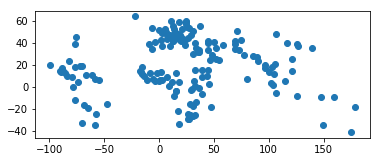

In [100]:
cities_with_country.plot()

In [108]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [113]:
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

In [114]:
boros.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [ ]:
In [3]: boro_locations = geopandas.tools.geocode(boros.BoroName, provider="google")

In [4]: boro_locations
Out[4]: 
                                geometry                       address
0         POINT (-74.1502007 40.5795317)        Staten Island, NY, USA
1         POINT (-73.7948516 40.7282239)               Queens, NY, USA
2  POINT (-73.94415789999999 40.6781784)             Brooklyn, NY, USA
3         POINT (-73.9712488 40.7830603)  Manhattan, New York, NY, USA
4         POINT (-73.8648268 40.8447819)                Bronx, NY, USA

In [5]: import matplotlib.pyplot as plt

In [6]: fig, ax = plt.subplots()

In [7]: boros.to_crs({"init": "epsg:4326"}).plot(ax=ax, color="white", edgecolor="black");

In [8]: boro_locations.plot(ax=ax, color="red");